In [1]:
# Capstone Research Questions
# How has HIV/AIDS epidemic impacted the community throughout the years? 
# What is the trend of individuals being diagnosed with HIV and AIDS in NYC by demographics (age, race/ethnicity)? 
# What neighborhood is most impacted? What neighborhood(s) should we prioritize? 


In [2]:
#import tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plot 
%matplotlib inline

df= pd.read_csv('https://raw.githubusercontent.com/caromundela/Class-Projects-/main/HIV_AIDS_Diagnoses_by_Neighborhood__Age_Group__and_Race_Ethnicity.csv')

In [3]:
#display column names 
list(df.columns)

['YEAR',
 'NEIGHBORHOOD',
 'RACE/ETHNICITY',
 'AGE',
 'TOTAL NUMBER OF HIV DIAGNOSES',
 'HIV DIAGNOSES PER 100,000 POPULATION',
 'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
 'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
 'TOTAL NUMBER OF AIDS DIAGNOSES',
 'AIDS DIAGNOSES PER 100,000 POPULATION',
 'Borough']

In [4]:
# identify num of rows and columns 
df.shape

(21036, 11)

In [5]:
# view data
df.head(5)

,YEAR,NEIGHBORHOOD,RACE/ETHNICITY,AGE,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION",Borough
0,2013,High Bridge - Morrisania,Native American,30 - 39,0,0,0,0,0,0,NaN
1,2010,East Harlem,Unknown,40 - 49,0,NaN,0,NaN,0,NaN,NaN
2,2011,High Bridge - Morrisania,Unknown,40 - 49,0,NaN,0,NaN,0,NaN,NaN
3,2012,Greenwich Village - SoHo,Native American,50 - 59,0,0,0,0,0,0,NaN
4,2011,Long Island City - Astoria,Multiracial,20 - 29,0,0,0,0,0,0,NaN


In [6]:
# rename the columns and drop columns 
df= df.rename(columns={'RACE/ETHNICITY': 'RACE', 'TOTAL NUMBER OF HIV DIAGNOSES': 'HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION':'HIV PER 10K POPULATION', 'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES': 'TOTAL NUM OF HIV/AIDS','PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES': 'PROPORTION OF HIV/AIDS', 'TOTAL NUMBER OF AIDS DIAGNOSES': 'AIDS DIAGNOSES', 'AIDS DIAGNOSES PER 100,000 POPULATION': 'AIDS PER 10K POPULATION'})
df.isnull().sum()

YEAR                          0
NEIGHBORHOOD                  0
RACE                          0
AGE                           0
HIV DIAGNOSES               101
HIV PER 10K POPULATION     1477
TOTAL NUM OF HIV/AIDS        25
PROPORTION OF HIV/AIDS     7464
AIDS DIAGNOSES               76
AIDS PER 10K POPULATION    1452
Borough                    8604
dtype: int64

In [7]:
# drop select columns 
drop_cols =['HIV PER 10K POPULATION','TOTAL NUM OF HIV/AIDS','PROPORTION OF HIV/AIDS', 'AIDS PER 10K POPULATION', 'Borough']
df.drop(drop_cols, inplace =True, axis=1)
df.head(5)

,YEAR,NEIGHBORHOOD,RACE,AGE,HIV DIAGNOSES,AIDS DIAGNOSES
0,2013,High Bridge - Morrisania,Native American,30 - 39,0,0
1,2010,East Harlem,Unknown,40 - 49,0,0
2,2011,High Bridge - Morrisania,Unknown,40 - 49,0,0
3,2012,Greenwich Village - SoHo,Native American,50 - 59,0,0
4,2011,Long Island City - Astoria,Multiracial,20 - 29,0,0


In [8]:
# clean & drop data that has missing values  
df.dropna()

,YEAR,NEIGHBORHOOD,RACE,AGE,HIV DIAGNOSES,AIDS DIAGNOSES
0,2013,High Bridge - Morrisania,Native American,30 - 39,0,0
1,2010,East Harlem,Unknown,40 - 49,0,0
2,2011,High Bridge - Morrisania,Unknown,40 - 49,0,0
3,2012,Greenwich Village - SoHo,Native American,50 - 59,0,0
4,2011,Long Island City - Astoria,Multiracial,20 - 29,0,0
...,...,...,...,...,...,...
21030,2021,Willowbrook,Asian/Pacific\nIslander,60+,0,0
21031,2021,Willowbrook,Black,60+,0,0
21032,2021,Willowbrook,Latino/Hispanic,60+,0,0
21034,2021,Willowbrook,White,60+,0,1


In [9]:
# look at the average of HIV and AIDS diagnoses 
df.mean()

YEAR    2015.763548
dtype: float64

In [10]:
# data tidying in order to redo average 
df['HIV DIAGNOSES']= pd.to_numeric(df['HIV DIAGNOSES'], errors ='coerce')
df['AIDS DIAGNOSES']= pd.to_numeric(df['AIDS DIAGNOSES'], errors ='coerce')
df.mean()

YEAR              2015.763548
HIV DIAGNOSES        7.363990
AIDS DIAGNOSES       4.760402
dtype: float64

In [11]:
# What is the trend of patients being diagnosed with HIV in NYC throughout the years? 
df.groupby(['YEAR'])['HIV DIAGNOSES'].count()

YEAR
2010    2126
2011    2127
2012    2131
2013    2107
2016    1755
2017    1756
2018    1764
2019    1763
2020    3529
2021    1764
Name: HIV DIAGNOSES, dtype: int64

<AxesSubplot:xlabel='YEAR'>

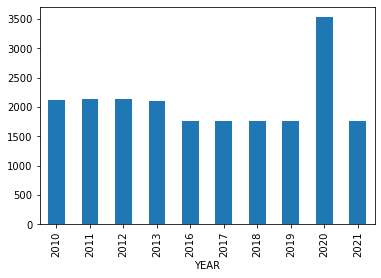

In [12]:
# VISUALIZE HIV DIAGNOSES BY YEAR 
df.groupby(['YEAR'])['HIV DIAGNOSES'].count().plot(kind='bar')

In [13]:
# What is the trend of patients being diagnosed with AIDS in NYC throughout the years? 
df.groupby(['YEAR'])['AIDS DIAGNOSES'].count()

YEAR
2010    2132
2011    2132
2012    2132
2013    2133
2016    1765
2017    1764
2018    1771
2019    1765
2020    3529
2021    1762
Name: AIDS DIAGNOSES, dtype: int64

<AxesSubplot:xlabel='YEAR'>

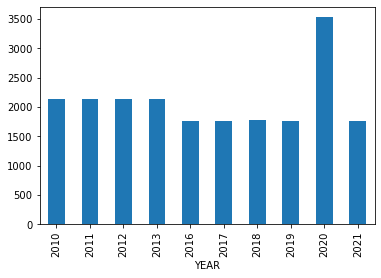

In [14]:
# VISUALIZE AIDS DIAGNOSES BY YEAR
df.groupby(['YEAR'])['AIDS DIAGNOSES'].count().plot(kind='bar')

<AxesSubplot:xlabel='YEAR'>

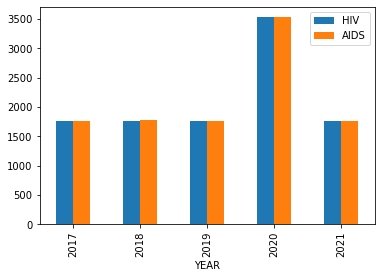

In [3]:
# creating graph looking at HIV & AIDS between 2017-2021 
df = pd.DataFrame({
    'YEAR': ['2017', '2018', '2019', '2020', '2021'],
    'HIV': [1756, 1764, 1763, 3529, 1764],
    'AIDS': [1764, 1771, 1765, 3529, 1762]
})
  
# plotting graph
df.plot(x="YEAR", y=["HIV", "AIDS"], kind="bar")

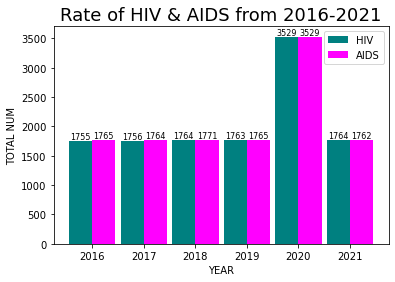

In [41]:
# creating graph looking at HIV & AIDS between 2017-2021 
import matplotlib.pyplot as plt
import numpy as np

# create sample dataset
data = np.array([[1755, 1756, 1764, 1763, 3529, 1764], [1765, 1764, 1771, 1765, 3529, 1762]])

# define labels and groups
labels = ['HIV', 'AIDS']
YEAR = ['2016','2017', '2018', '2019', '2020', '2021']

# define figure and axis objects
fig, ax = plt.subplots()

# plot the grouped bar chart, add colors 
width = 0.45
x = np.arange(len(YEAR))
ax.bar(x - width/2, data[0], width, label=labels[0], color = 'teal')
ax.bar(x + width/2, data[1], width, label=labels[1], color = 'magenta')

# add text annotations to each bar, change font size
for i, j in enumerate(data):
   for x_val, y_val in zip(x, j):
      ax.annotate(str(y_val), xy=(x_val+i*width-width/2, y_val), ha='center', va='bottom', fontsize = 8)
        

# add labels and legend
ax.set_xticks(x)
ax.set_xticklabels(YEAR)
ax.set_xlabel('YEAR')
ax.set_ylabel('TOTAL NUM')
ax.set_title("Rate of HIV & AIDS from 2016-2021", fontsize = 18)
ax.legend()
plt.show()

In [15]:
#create a new dataframe 
df2= df[['YEAR', 'NEIGHBORHOOD','RACE', 'AGE', 'HIV DIAGNOSES', 'AIDS DIAGNOSES']]
df2.head(5)

,YEAR,NEIGHBORHOOD,RACE,AGE,HIV DIAGNOSES,AIDS DIAGNOSES
0,2013,High Bridge - Morrisania,Native American,30 - 39,0.0,0.0
1,2010,East Harlem,Unknown,40 - 49,0.0,0.0
2,2011,High Bridge - Morrisania,Unknown,40 - 49,0.0,0.0
3,2012,Greenwich Village - SoHo,Native American,50 - 59,0.0,0.0
4,2011,Long Island City - Astoria,Multiracial,20 - 29,0.0,0.0


In [16]:
#view by neighborhood 
df2.groupby(['NEIGHBORHOOD'])['HIV DIAGNOSES'].count().sort_values(ascending=False)

NEIGHBORHOOD
All                                      1558
Borough Park                              459
Williamsburg - Bushwick                   459
Southeast Queens                          459
Jamaica                                   459
Fresh Meadows                             459
Kingsbridge - Riverdale                   459
West Queens                               459
East Flatbush - Flatbush                  458
Long Island City - Astoria                458
Pelham - Throgs Neck                      458
Stapleton - St. George                    457
Southwest Queens                          457
Ridgewood - Forest Hills                  456
Port Richmond                             456
Canarsie - Flatlands                      456
Fordham - Bronx Park                      456
East Harlem                               456
Bayside - Little Neck                     456
Rockaway                                  455
Chelsea - Clinton                         454
Northeast Bronx      

In [17]:
#group by race 
df2.groupby(['RACE'])['HIV DIAGNOSES'].count()

RACE
All                        2528
Asian/Pacific\nIslander    2012
Asian/Pacific Islander     1197
Black                      3137
Hispanic                   1202
Latino/Hispanic            2013
Multiracial                1172
Native American            1188
Other/Unknown              1981
Unknown                    1204
White                      3188
Name: HIV DIAGNOSES, dtype: int64

In [18]:
#Age range & number of HIV Diagnoses 
df2.groupby(['AGE'])['HIV DIAGNOSES'].count()

AGE
0 - 19      1201
13 -\n19    2000
20 -\n29    1993
20 - 29     1180
30 -\n39    1997
30 - 39     1182
40 -\n49    1998
40 - 49     1174
50 -\n59    1998
50 - 59     1184
60+         3204
All         1711
Name: HIV DIAGNOSES, dtype: int64

In [19]:
#Age range & number of AIDS Diagnoses 
df2.groupby(['AGE'])['AIDS DIAGNOSES'].count()

AGE
0 - 19      1204
13 -\n19    2015
20 -\n29    2003
20 - 29     1197
30 -\n39    1998
30 - 39     1189
40 -\n49    1996
40 - 49     1180
50 -\n59    1995
50 - 59     1186
60+         3212
All         1710
Name: AIDS DIAGNOSES, dtype: int64

In [21]:
#Age range & number of AIDS Diagnoses 
df2.groupby(['AGE'])['AIDS DIAGNOSES'].mean()

AGE
0 - 19       0.153654
13 -\n19     0.219851
20 -\n29     3.349476
20 - 29      1.352548
30 -\n39     5.868368
30 - 39      1.656013
40 -\n49     4.348196
40 - 49      2.143220
50 -\n59     4.637093
50 - 59      1.396290
60+          2.155355
All         27.914035
Name: AIDS DIAGNOSES, dtype: float64

In [23]:
#Age range & number of AIDS Diagnoses 
df2.groupby(['AGE'])['HIV DIAGNOSES'].mean()

AGE
0 - 19       0.482931
13 -\n19     1.285500
20 -\n29    12.174109
20 - 29      3.483898
30 -\n39     9.988983
30 - 39      2.478849
40 -\n49     5.103604
40 - 49      2.231687
50 -\n59     4.093093
50 - 59      1.192568
60+          1.454744
All         42.000000
Name: HIV DIAGNOSES, dtype: float64

In [20]:
#group by race 
df2.groupby(['RACE'])['AIDS DIAGNOSES'].count()

RACE
All                        2528
Asian/Pacific\nIslander    2009
Asian/Pacific Islander     1200
Black                      3169
Hispanic                   1203
Latino/Hispanic            2014
Multiracial                1194
Native American            1188
Other/Unknown              1984
Unknown                    1204
White                      3192
Name: AIDS DIAGNOSES, dtype: int64

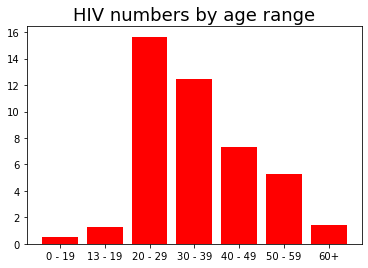

In [48]:
#Visualize age range and HIV diagnoses 
x = np.array(["0 - 19", "13 - 19", "20 - 29", "30 - 39", "40 - 49", "50 - 59", "60+"])
y = np.array([0.483, 1.286, 15.658 , 12.468, 7.336, 5.286, 1.455])

#add color to the graph
plt.bar(x, y, color = 'red')
plt.title("HIV numbers by age range", fontsize = 18)
plt.show()

<ipython-input-87-b5d30724f597>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',


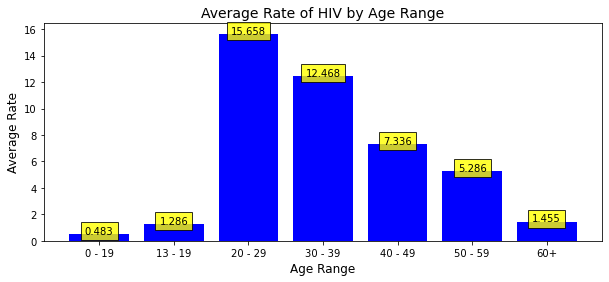

In [87]:
#Visualize age range and HIV diagnoses with labels 
              
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'yellow', alpha =.8))
        
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x = ["0 - 19", "13 - 19", "20 - 29", "30 - 39", "40 - 49", "50 - 59", "60+"]
    y = [0.483, 1.286, 15.658 , 12.468, 7.336, 5.286, 1.455]
     
    # setting figure size by using figure() function
    plt.figure(figsize = (10,4))
     
    # making the bar chart on the data and adding color type 
    plt.bar(x, y, color = 'blue')
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot and font size 
    plt.title("Average Rate of HIV by Age Range", fontsize = '14')
     
    # giving X and Y labels and font size 
    plt.xlabel("Age Range", fontsize = '12')
    plt.ylabel("Average Rate", fontsize = '12')
     
    # visualizing the plot
    plt.show()

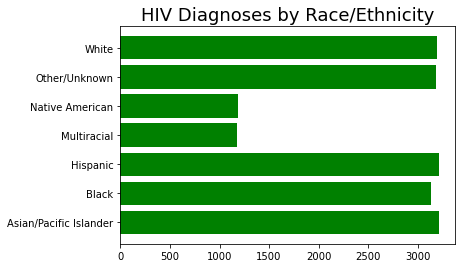

In [61]:
#Visualize race and HIV diagnosis
x = np.array(["Asian/Pacific Islander", "Black", "Hispanic", "Multiracial", "Native American", "Other/Unknown", "White"])
y= np.array([3209, 3137, 3215, 1172, 1188, 3185, 3188])

#make horizontal bar chart easier to read race
plt.barh(x, y, color = 'green')
plt.title("HIV Diagnoses by Race/Ethnicity", fontsize = 18)
plt.show()

<ipython-input-90-43a7a4b7eb3d>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, x[i], y[i], ha = 'left',


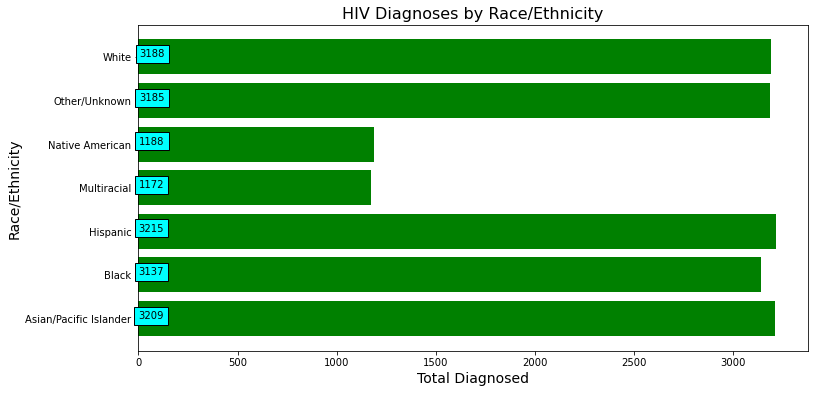

In [90]:
 #Visualize race and HIV diagnosis
    
# function to add value labels and color 
def addlabels(x,y):
    for i in range(len(y)):
        plt.text(i, x[i], y[i], ha = 'left',
                 Bbox = dict(facecolor = 'cyan', alpha =1.0))
        
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x = np.array(["Asian/Pacific Islander", "Black", "Hispanic", "Multiracial", "Native American", "Other/Unknown", "White"])
    y = np.array([3209, 3137, 3215, 1172, 1188, 3185, 3188])
     
    # setting figure size by using figure() function
    plt.figure(figsize = (12,6))
     
    # making the horizontal bar chart on the data and adding color 
    plt.barh(x, y, color = 'green')
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot and increase font size 
    plt.title("HIV Diagnoses by Race/Ethnicity", fontsize = '16')
     
    # giving X and Y labels and adjust font size 
    plt.xlabel("Total Diagnosed", fontsize = '14')
    plt.ylabel("Race/Ethnicity", fontsize = '14')
     
    # visualizing the plot
    plt.show()

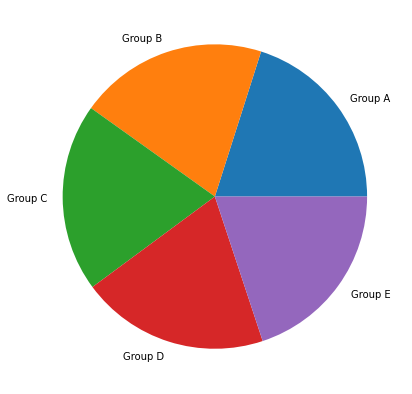

In [34]:
#Top neighborhoods with highest HIV rates
Priority = ['Group A', 'Group B', 'Group C',
           'Group D', 'Group E']
 
data = [459, 458, 457, 456, 455]
 
# Creating pie chart
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Priority)
 
# show plot
plt.show()

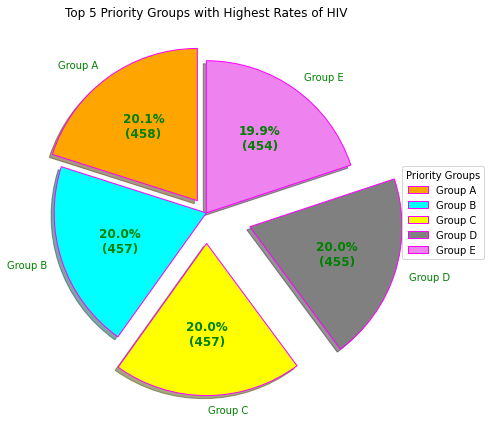

In [34]:
#Top neighborhoods with highest HIV rates add labels and explode pieces 
Priority = ['Group A', 'Group B', 'Group C',
           'Group D', 'Group E']
 
data = [459, 458, 457, 456, 455]
 
# Creating explode data how much the slices will explode
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
 
# Choosing colors for each piece 
colors = ( "orange", "cyan", "yellow",
          "grey", "violet", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "magenta" }
 
# Creating autocpt arguments for the labels 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Priority,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="green"))
 
# Adding legend
ax.legend(wedges, Priority,
          title ="Priority Groups",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Top 5 Priority Groups with Highest Rates of HIV")
 
# show plot
plt.show()